In [2]:
import spacy

In [3]:
from nltk import sent_tokenize

In [11]:
f  = open('./pubmed_result.txt')

In [12]:
fr = f.read()

In [20]:
fr.split('\n\n\n')[0].split('\n\n')

['\n1. Sci Rep. 2017 Nov 9;7(1):15196. doi: 10.1038/s41598-017-15566-4.',
 '1000-Year Quasi-Periodicity of Weak Monsoon Events in Temperate Northeast Asia\nsince the Mid-Holocene.',
 'Jo KN(1)(2), Yi S(3), Lee JY(4)(5), Woo KS(4), Cheng H(6)(7), Edwards LR(6), Kim \nST(8).',
 "Author information: \n(1)Division of Geology and Geophysics, College of Natural Sciences, Kangwon\nNational University, Chuncheon, Korea. kjo@kangwon.ac.kr.\n(2)Critical zone Frontier Research Laboratory (CFRL), Kangwon National\nUniversity, Chuncheon, Korea. kjo@kangwon.ac.kr.\n(3)Korea Institute of Geoscience and Mineral Resources (KIGAM), Daejeon, Korea.\n(4)Division of Geology and Geophysics, College of Natural Sciences, Kangwon\nNational University, Chuncheon, Korea.\n(5)Critical zone Frontier Research Laboratory (CFRL), Kangwon National\nUniversity, Chuncheon, Korea.\n(6)Department of Geology and Geophysics, University of Minnesota, Minneapolis,\nUSA.\n(7)Institute of Global Environmental Change, Xi'an Jiao

In [27]:
abstracts = []
for each in fr.split('\n\n\n'):
    for n,l in enumerate(each.split('\n\n')):
        key = "Author information:"
        if l[0:len(key)] == key:
            abstracts.append(each.split('\n\n')[n+1].replace('\n',' '))
        

In [32]:
sentences = []
for abstract in abstracts:
    sentences += abstract.split('. ')

In [61]:
sp_en = spacy.load('en')

In [70]:
sentences[0].decode('utf8')

u'The Holocene variability in the East Asian summer monsoon (EASM) based on speleothem \u03b4(18)O records has inconsistencies in timing, duration, and expression of millennial-scale events among nearby regions, and even within the same cave'

In [81]:
def get_lemma(sentence):
    d = sp_en(sentence.decode('utf8'))
    return ' '.join([l.lemma_ for l in d])

In [83]:
sentences_new = [get_lemma(x) for x in sentences]

In [84]:
x_bow_new = get_bow(sentences_new)

In [39]:
def get_bow(sentences):
    from sklearn.feature_extraction.text import CountVectorizer
    cv = CountVectorizer(min_df=5, stop_words="english")
    x = cv.fit_transform(sentences)
    return x.toarray()

In [41]:
x_bow = get_bow(sentences)

In [42]:
x_bow.shape

(3163, 2023)

In [85]:
x_bow_new.shape

(3163, 1795)

In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components=2,random_state=0)

In [45]:
x_bow_pc = pca.fit_transform(x_bow)

In [46]:
x_bow_pc.shape

(3163, 2)

In [49]:
from sklearn.cluster import KMeans

In [50]:
km = KMeans(n_clusters=10,random_state=0)


In [51]:
cluster = km.fit_predict(x_bow_pc)

In [52]:
x_bow.shape

(3163, 2023)

In [53]:
x_bow_pc.shape

(3163, 2)

In [54]:
cluster.shape

(3163,)

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

In [56]:
x_bow_pc

array([[-0.17382663, -0.150556  ],
       [-0.20719218, -0.10901151],
       [-0.21635766, -0.20575071],
       ..., 
       [-0.21183965, -0.11912846],
       [ 0.42636514, -0.07870533],
       [ 0.45358167,  0.91599497]])

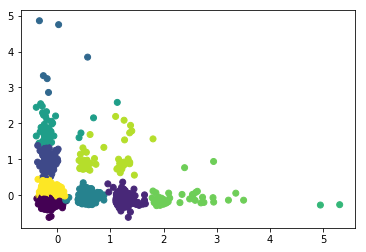

In [55]:
plt.scatter(x_bow_pc[:,0],x_bow_pc[:,1],c=cluster)

In [23]:
list(enumerate(a))

[(0, 'a'), (1, 'b'), (2, 'c')]